In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [54]:
dataset = pd.read_csv(r"C:\Users\Chinu\Downloads\wine.csv")

In [55]:
# Split into feature and target arrays
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [56]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Convert class vectors to binary class matrices
y_train = np.eye(3)[y_train - 1]
y_test = np.eye(3)[y_test - 1]

In [59]:
# Create the model
NNmodel = Sequential()
NNmodel.add(Dense(128, activation='relu', input_dim=13))
NNmodel.add(Dense(64, activation='relu'))
NNmodel.add(Dense(32, activation='relu'))
NNmodel.add(Dense(16, activation='relu'))
NNmodel.add(Dense(3, activation='softmax'))

In [60]:
# Compile the model
NNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
# Train the model
NNmodel.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.0645 - accuracy: 0.4797
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9182 - accuracy: 0.8049
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7823 - accuracy: 0.8780
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.9268
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.9593
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.9675
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2821 - accuracy: 0.9756
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1964 - accuracy: 0.9756
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9756
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9919
Epoch 11/100
4/4 [===========

In [62]:
# Evaluate the model on the test data
test_loss, test_accuracy = NNmodel.evaluate(X_test, y_test)
print('Test Loss:', test_loss*100)
print('Test Accuracy:', test_accuracy*100)

2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 1.0000
Test Loss: 1.8932200968265533
Test Accuracy: 100.0


In [63]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
4/4 [==============================] - 0s 33ms/step - loss: 5.3011e-05 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 5.2439e-05 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 5.1905e-05 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 5.1424e-05 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 5.0810e-05 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 5.0292e-05 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 18ms/step - loss: 4.9782e-05 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000

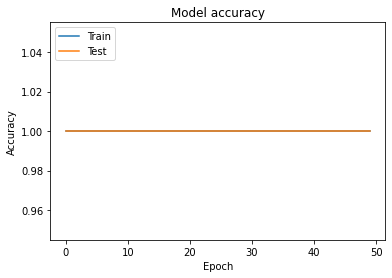

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

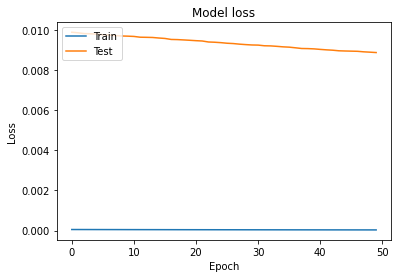

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()